In [2]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Please write your name below** (in case the file names get mixed up)

Author: Mario Roca

**Generic note**: in this whole lab and from now, unless explicitly asked, you are not required to implement yourself the algorithms that you use. You may instead use existing implementations from e.g. scikit-learn.

In general, when you use implementations of algorithms that are not your own (which will be the case 99% of the time in real life), it is a good idea to check the documentation of the libraries you use to make sure you are not missing something important. As such, you are strongly encouraged to do so in this lab.

**Note bis**: in this lab, some questions may be (deliberately) ambiguous, or there may be multiple acceptable solutions (but also some unacceptable ones). So do not panic if you do not have exactly the same result as your neighbor, or as the future solution.

The goal is to make you learn by forcing you to think about what is happening and what should be done in different situations. However, so goal is **not** to punish you by giving you a bad grade because of some trick questions. So once again, **do not hesitate to ask questions**, and do not hesitate to ask an instructor whether your solution seems correct during lab sessions.

# Dataset

Let's load data for classification. This data is generated and does not a precise meaning: the idea will be to build intuition about what is going on with different models.

Dataset can be downloaded here: https://drive.google.com/file/d/1Sy0Ly4Xj8fzPAiPru9oFS6evgQjuNMs4/view?usp=sharing

In [3]:
# Load the dataset;
# make sure that the file is located in the same folder as the notebook
# (or change the path)
dataset = np.load("../Datasets/dataset.npy")

In [4]:
# Extract features and targets
print(f'Shape of the dataset: {dataset.shape}')
X = dataset[:,:2] # features are first 2 columns
y = dataset[:,-1] # labels are last column
print(f'Shape of feature matrix: {X.shape}')

Shape of the dataset: (300, 3)
Shape of feature matrix: (300, 2)


In [5]:
unique_values = np.unique(y)
print(unique_values)

[0. 1.]


# Data preparation

We are going to do classification with different models, that will require selecting some hyper-parameter(s).

**In general, how should the dataset be split in this case?**

*In this case, since we will select hype-parameters we should split the dataset in three parts: training set, validation set and test set. The training set is used to train the model. The validation set to tune the hyperparameters and the test set to evaluate the final model performances.*

**For now, split the dataset into one training, one validation and one testing sets.** You can use the sklearn.model_selection.train_test_split function (but you don't have to).

We shall use the name X_train, X_val and X_test (respectively y_train, y_val and y_test) to refer to the samples (respectively labels) of these sets.

In [6]:
from sklearn.model_selection import train_test_split

# Split dataset into training+validation and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training+validation set into training and validation sets (75% train, 25% val of the 80% train+val)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


It is generally a good idea to have a look at the data whenever possible.

**Display the training dataset using a scatterplot**

*We should display colors for classes (or any other way to differentiate them such as shapes), otherwise we are not learning much.*

<Figure size 800x600 with 0 Axes>

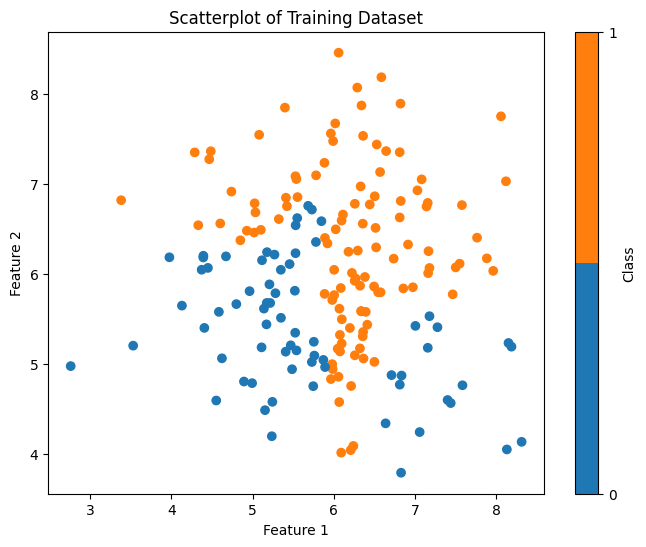

In [7]:
from matplotlib.colors import ListedColormap

# Create scatterplot for the training dataset
plt.figure(figsize=(8, 6))
# Define a discrete colormap
cmap = ListedColormap(['#1f77b4', '#ff7f0e'])

# Create scatterplot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Scatterplot of Training Dataset')
plt.colorbar(label='Class', ticks=[0, 1])

# (Linear) model training

## Basic model training

**Train a first <ins>linear</ins>, <ins>classification</ins> model.** Do **not** use regularization for now.

You don't have to reimplement everything, you can use existing implementations (for example the one from scikit-learn). Don't evaluate the performance of the model for now, just train it.

In [8]:
from sklearn.linear_model import LogisticRegression

# Fit a linear classification model without regularization
log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train)

LogisticRegression(penalty=None)

**Are you *certain* your model does not have regularization?**

*As said in the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression regularization is applied by default but I defined the Logistic Regression classifier with the penalty parameters = None, so there should not be any regularization applied.*

**What is the score of the model?**

(by "score", we mean "accuracy" here, i.e. the fraction of correct predictions).

In [9]:
predictions = log_reg.predict(X_test)
print("Some predictions:", predictions[:5])
accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy:.2f}')

Some predictions: [0. 0. 1. 0. 1.]
Accuracy: 0.77


**What if, instead of directly doing binary classification, we wanted to have some estimation of how confident the model is?**

Or, how could we obtain probabilities between 0 and 1 instead of binary predictions? (**Hint**: look at the doc of the model you used).

**Don't answer the question with words, directly provide the corresponding probability estimates.**

In [10]:
probabilities = log_reg.predict_proba(X_test)
print("Some predictions:", probabilities[:5])

Some predictions: [[0.59951555 0.40048445]
 [0.75921742 0.24078258]
 [0.26584335 0.73415665]
 [0.90702557 0.09297443]
 [0.06614605 0.93385395]]


**Assuming we only had these probabilities, could we still make binary predictions?**

*Yes, the predict_proba function returns the probabilities estimates for all classes ordered by the label of classes. This means that in this case we can make binary predictions by simply taking the highest probabilities between the two estimates*

In [11]:
# Transform probabilities into binary predictions
binary_predictions = (probabilities[:, 1] >= 0.5).astype(int)
print("Binary predictions:", binary_predictions)
accuracy_2 = np.mean(binary_predictions == y_test)
print(f'Accuracy: {accuracy_2:.2f}')

Binary predictions: [0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1]
Accuracy: 0.77


## Visualization of predictions

Now, let's visualize our probability estimates. Scikit-learn provides a useful tool for this: DecisionBoundaryDisplay.

The exact way it works is not that important, but the general is: we use our model to predict a probability for every pixel in the area of interest, based on its coordinates (which are its 2D features), and we display a color  corresponding to the estimated probability.

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

I will retrain a logistic regression for the purpose of illustrating this. This may not be the exact solution to the previous questions.

In [13]:
# Train a logistic regression
logreg = LogisticRegression() # (hyper)-parameters may differ from previous question
logreg.fit(X_train, y_train)

LogisticRegression()

And now we display the probabilities:

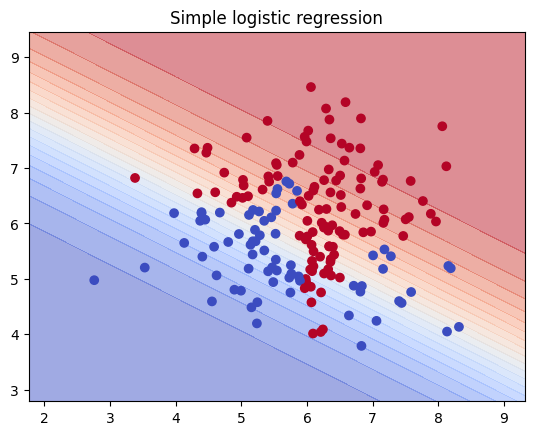

In [14]:
# Use DecisionBoundaryDisplay to display a heatmap corresponding to the estimated probabilities
disp = DecisionBoundaryDisplay.from_estimator(
    logreg, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
# Add the training points on top using a scatterplot
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Simple logistic regression")
plt.show()

**Does this look like a good fit?**

*It's not that bad. We have around 77% accuracy. But we could do better with a non linear decision boundary*

**Could we adapt our logistic regression model to have non-linear decision boundaries? How?**

*Yes, using polynomial features. By transforming the original features into polynomial features, we allow the logistic regression model to capture non-linear relationships between the features and the target variable*

## Non-linear logistic regression

**Train a logistic regression model using polynomial features. Are there any hyper-parameter? If yes, use a <ins>rigorous</ins> selection process to select an appropriate value.**

You can ignore regularization for now.

In [15]:
from sklearn.preprocessing import PolynomialFeatures

def train_logistic_regression_with_poly_features(X_train, y_train, X_val, y_val, degree=2):
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    # Transform validation set as well
    X_val_poly = polynomial_features.transform(X_val)

    # Fit a logistic regression model with polynomial features
    log_reg_poly = LogisticRegression(penalty=None)
    log_reg_poly.fit(X_train_poly, y_train)

    # Predict on validation set
    predictions = log_reg_poly.predict(X_val_poly)
    accuracy = np.mean(predictions == y_val)
    return log_reg_poly, accuracy

best_accuracy = 0
best_degree = 1
model = None
for degree in range(1, 6):
    current_model, accuracy = train_logistic_regression_with_poly_features(X_train, y_train, X_val, y_val, degree=degree)
    print(f'Degree: {degree}, accuracy: {accuracy:.2f}')
    if accuracy > best_accuracy:
        model = current_model
        best_accuracy = accuracy
        best_degree = degree

print(f'Best degree: {best_degree} with accuracy: {best_accuracy:.2f}')

Degree: 1, accuracy: 0.77
Degree: 2, accuracy: 0.80
Degree: 3, accuracy: 0.88
Degree: 4, accuracy: 0.88
Degree: 5, accuracy: 0.88
Best degree: 3 with accuracy: 0.88


/Users/marioroca/mlclass/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/marioroca/mlclass/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

**If you were to proudly announce the performance of your model to the public, what is the value that you would you disclose?**

*It would be the accuracy on the test set*

In [16]:
# Create polynomial features
polynomial_features = PolynomialFeatures(degree=best_degree)
X_test_poly = polynomial_features.fit_transform(X_test)

# Predict on test set
pred_test = model.predict(X_test_poly)
accuracy = np.mean(pred_test == y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.87


Now, we may want to also visualize the decision boundaries of our model with polynomial features.

Unfortunately, giving a matrix X_train_poly (for instance) of shape (100, 10) (for instance) to DecisionBoundaryDisplay.from_estimator will result in an error, as DecisionBoundaryDisplay only knows how to handle pixels in 2D, not in 10D.

Fortunately, we can combine a series of transformation on X_train as a single estimator using scikit-learn's Pipeline. We can also introduce other preprocessing (or even postprocessing) steps in the process, such as feature standardization.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [18]:
# Create a pipeline that first standardizes the data,
# then transforms it with PolynomialFeatures
# and finally fits LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize features
    ('poly', PolynomialFeatures(degree=2)), # for instance
    ('logreg', LogisticRegression(max_iter=500)) # for instance
])

Now we can directly call "fit" on this pipeline to train the model, and give this pipeline to DecisionBoundaryDisplay so that for each pixel, it can:
- compute the corresponding polynomial features from the initial 2D coordinates
- give these features to our logistic regression

and then display the heatmap of estimated probabilities as previously.

In [19]:
# Fit the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg', LogisticRegression(max_iter=500))])

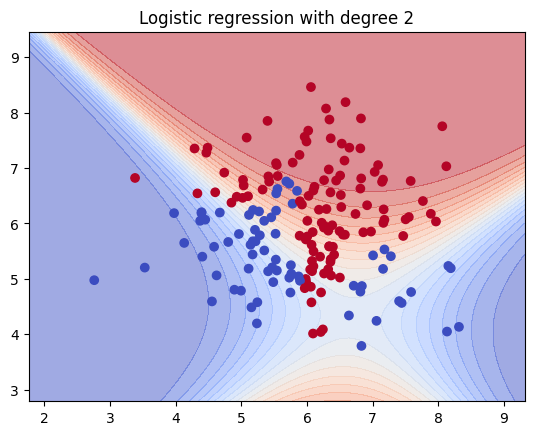

In [20]:
# Give the pipeline to DecisionBoundaryDisplay to plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title("Logistic regression with degree 2")
plt.show()

**Do the features <ins>used</ins> by the model have zero mean and unit standard deviation with our current pipeline? If not, what should be changed so that this is the case?**

*Yes, the feature used by the model have zero mean and unit standard deviation. That's exactly the role of the StandardScaler(). As said in the documentation(https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html): StandardScaler() standardize features by removing the mean and scaling to unit variance.*

In [21]:
# Extract the scaler from the pipeline
scaler = pipeline.named_steps['scaler']

# Transform the training data using the scaler
X_train_scaled = scaler.transform(X_train)

# Calculate the mean and standard deviation of the scaled features
mean = np.mean(X_train_scaled, axis=0)
std = np.std(X_train_scaled, axis=0)

print(f'Mean of scaled features: {mean}')
print(f'Standard deviation of scaled features: {std}')

Mean of scaled features: [-4.83193732e-15  2.36893838e-15]
Standard deviation of scaled features: [1. 1.]


**Now plot the probability heatmap of *your* model from earlier**

*The best model found earlier was using polynomial degree = 3. However my previously model was not using scikit's Pipeline. Hence, in order to do the plot I need to re-fit the model*

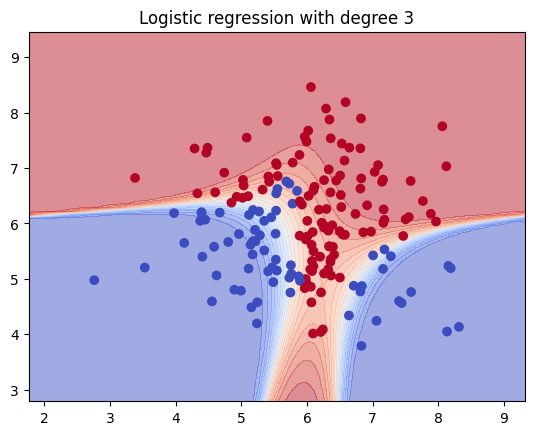

In [22]:
# Define the pipeline of the previous model with the best degree
my_pipeline = Pipeline([
    ('scaler', StandardScaler()), # this time also standardize the features
    ('poly', PolynomialFeatures(degree=best_degree)), 
    ('logreg', LogisticRegression(max_iter=500))
])
# Fit the pipeline
my_pipeline.fit(X_train, y_train)

# Plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    my_pipeline, X_train,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title(f"Logistic regression with degree {best_degree}")
plt.show()

**Any observation?**

*A 3-degree decision boundary definetily makes sense with our data distribution. The new curve is more suited to separate the two regions. Not by chance we had the highest accuracy with degree = 3*

## Regularization and k-fold cross-validation

Our estimation of the best hyper-parameter may not be super robust, because we do not have many validation samples. So the size of our validation set is limited.

To overcome this, we will use **k-fold cross-validation.**

You do not need to implement it yourself. We will use scikit-learn's GridSearchCV from sklearn.model_selection instead, that enables to do k-fold to try different values of hyper-parameters.
 
As usual, do not hesitate to have a look at scikit-learn's documentation on this.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# Defining a pipeline
clf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('logreg', LogisticRegression(max_iter=500, solver='liblinear'))
])

Assuming we want to do test different possible values for the *"include_bias"* (hyper)parameter of PolynomialFeatures, and different values for *"penalty"* in LogisticRegression, we can specify the values to try as such:

In [25]:
# Defining the set of hyperparameters
hyperparameters = {
    'poly__include_bias': [True, False],
    'logreg__fit_intercept': [True, False]
}

And then, we can run k-fold to find the best combination of hyper-parameters like so:

In [26]:
# Running grid search
gridsearch = GridSearchCV(clf_pipeline, hyperparameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('logreg',
                                        LogisticRegression(max_iter=500,
                                                           solver='liblinear'))]),
             param_grid={'logreg__fit_intercept': [True, False],
                         'poly__include_bias': [True, False]})

The average score of the k-fold cross-validation for each set of hyper-parameter can be accessed as such:

In [27]:
gridsearch.cv_results_["mean_test_score"]

array([0.8       , 0.79444444, 0.79444444, 0.75      ])

We could look at the hyper-parameters used for each run of k-fold to determine to best set of hyper-parameters. Scikit-learn also conviently provides a function/attribute that directly returns the best estimator:

In [28]:
gridsearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('logreg',
                 LogisticRegression(max_iter=500, solver='liblinear'))])

**How many <ins>total</ins> model trainings took place here?**

We are using 4 hyperparameters:
  - `poly__include_bias`: [True, False] -> 2 values
  - `logreg__fit_intercept`: [True, False] -> 2 values

Since we didn't define the 'cv' parameter for the GridSearchCV() as written in the doc (https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html): None -> use the default 5-fold cross validation

Hence we are using 5-fold cross validation

Total models: 4 × 5 = 20 models


Since we are now doing k-fold cross-validation, we can merge our training set and our validation set into a single dataset, which be split again during k-fold.

**Merge the training and validation set**

You may call the resulting matrices and vectors X_fold and y_fold

In [29]:
# Merge the training and validation sets
X_fold = np.concatenate((X_train, X_val), axis=0)
y_fold = np.concatenate((y_train, y_val), axis=0)

print(f'Shape of X_fold: {X_fold.shape}')
print(f'Shape of y_fold: {y_fold.shape}')

Shape of X_fold: (240, 2)
Shape of y_fold: (240,)


**Find the best combination of polynomial degree and regularization using k-fold cross-validation, with $k=10$**

In [30]:
# Defining the set of hyperparameters
hyperparameters = {
    'poly__degree': [1, 2, 3, 4, 5],
    'logreg__penalty': ['l1', 'l2'],
}

# Running grid search with 10-fold cross-validation
gridsearch = GridSearchCV(clf_pipeline, hyperparameters, cv=10)
gridsearch.fit(X_fold, y_fold)

# Print the best parameters found
print(f'Best parameters: {gridsearch.best_params_}')
print(f'Best cross-validation accuracy: {gridsearch.best_score_:.2f}')



Best parameters: {'logreg__penalty': 'l1', 'poly__degree': 3}
Best cross-validation accuracy: 0.96


**Plot the corresponding probability heatmap**

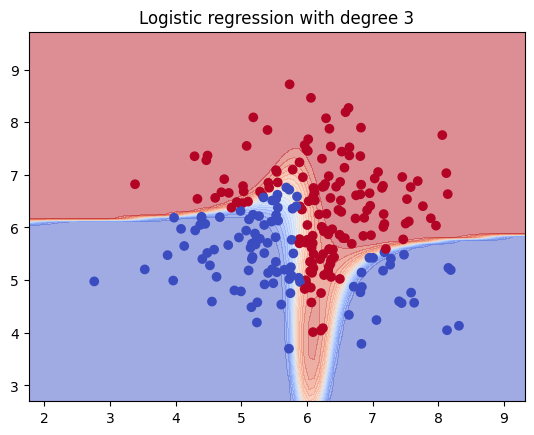

In [31]:
# Plot the probability heatmap
disp = DecisionBoundaryDisplay.from_estimator(
    gridsearch, X_fold,
    response_method="predict_proba",
    cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
    alpha=0.5, # level of transparency
    levels=20 # use 20 different nuances of color
)
disp.ax_.scatter(X_fold[:, 0], X_fold[:, 1], c=y_fold, cmap=plt.cm.coolwarm)
plt.title(f"Logistic regression with degree {best_degree}")
plt.show()

**What is the final accuracy of your model?**

In [32]:
accuracy = gridsearch.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

Test accuracy: 0.97


Now we are starting to have good methodology!

Even though accuracy may not always be best way to measure performance, but we will cover that in later classes.

# Exploration of other algorithms

Now, we will use the heatmap displays to build some intuition about what happens with other classification algorithms.

## K-Nearest Neighbors

**Can we obtain probabilities with K-NN?**

For this question, "probability" may be interpreted as "a measure of confidence more precise than a yes/no answer".

*Yes, the KNeighborsClassifier from scikit-learn has the method predict_proba(X) that return probability estimates for the test data X. I will use it in the next block.*

**Fit K-NN on the training dataset with K ranging for 1 to 6, and plot the confidence heatmap.**

In [33]:
def plot_probability_heatmap(model, X, y, title):
    # Plot the probability heatmap
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X,
        response_method="predict_proba",
        cmap=plt.cm.coolwarm, # colors to use (0 is blue, 1 is red)
        alpha=0.5, # level of transparency
        levels=20 # use 20 different nuances of color
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

Probability prediction using KNN with k=1:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


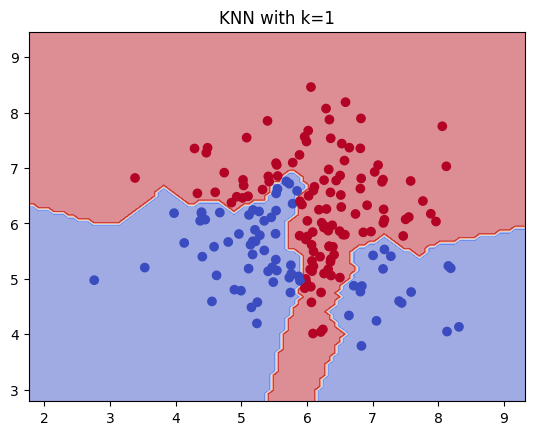

Probability prediction using KNN with k=2:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


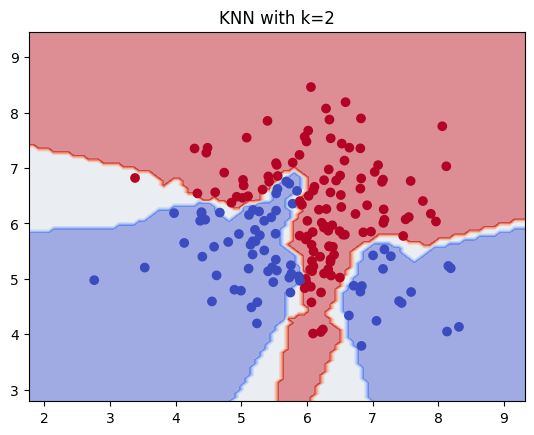

Probability prediction using KNN with k=3:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


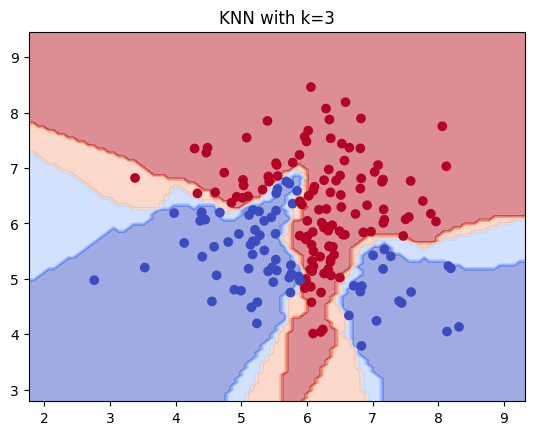

Probability prediction using KNN with k=4:  [[1.   0.  ]
 [0.25 0.75]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]]


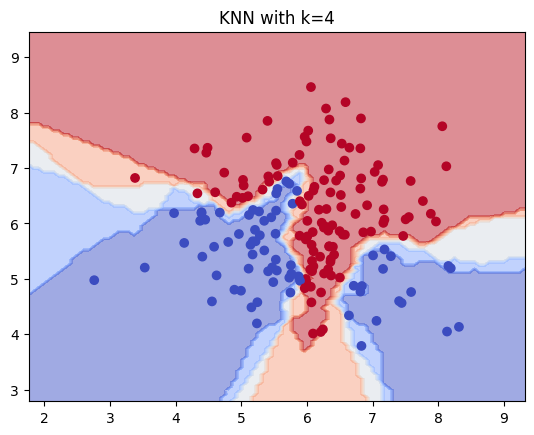

Probability prediction using KNN with k=5:  [[1.  0. ]
 [0.4 0.6]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]]


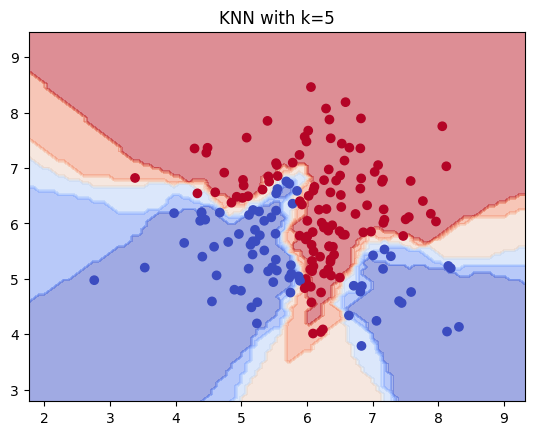

Probability prediction using KNN with k=6:  [[1.         0.        ]
 [0.33333333 0.66666667]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]]


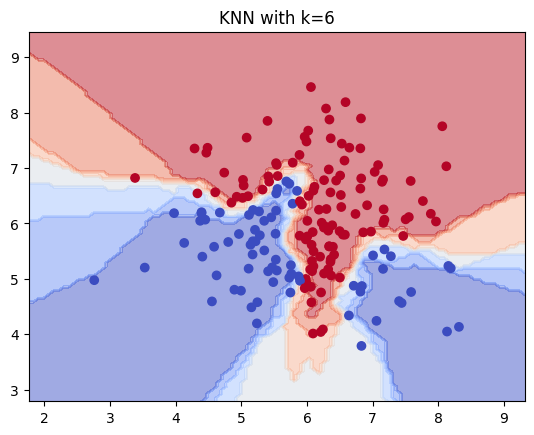

In [37]:
from sklearn.neighbors import KNeighborsClassifier

for i in range (1, 7):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print(f"Probability prediction using KNN with k={i}: ",  knn.predict_proba(X_test)[:5])
    plot_probability_heatmap(knn, X_train, y_train, f'KNN with k={i}')
    



**Briefly explain what's happening**

*When k is too large, the model may include neighbors that are not relevant to the local region of the query point, leading to incorrect classifications. 
This can cause the model to underfit, meaning it may not capture the underlying patterns in the data well.
As we can notice by the decreasing probabilities, the model is becoming less and less confident about the prediction.*

## Naive Bayes

**Choose a suitable Naive Bayes classifier, and do same thing**

Probability prediction using Naive Bayes:  [[0.5905044  0.4094956 ]
 [0.62196825 0.37803175]
 [0.25906922 0.74093078]
 [0.7977187  0.2022813 ]
 [0.07302342 0.92697658]]


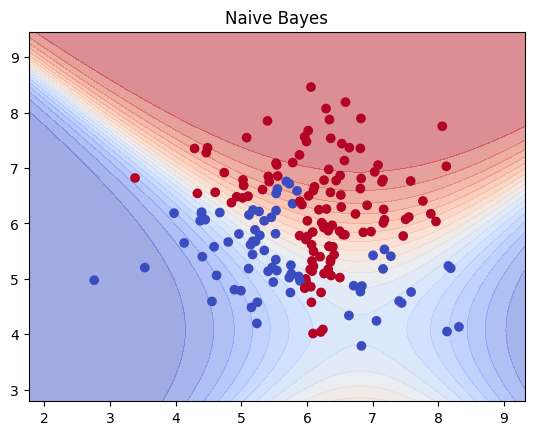

In [40]:
from sklearn.naive_bayes import GaussianNB

nayve_bayes = GaussianNB()
nayve_bayes.fit(X_train, y_train)
print(f"Probability prediction using Naive Bayes: ",  nayve_bayes.predict_proba(X_test)[:5])
plot_probability_heatmap(nayve_bayes, X_train, y_train, 'Naive Bayes')

**Are there any hyper-parameter?**

Best parameters: {'var_smoothing': np.float64(0.004281332398719396)}
Best cross-validation accuracy: 0.80


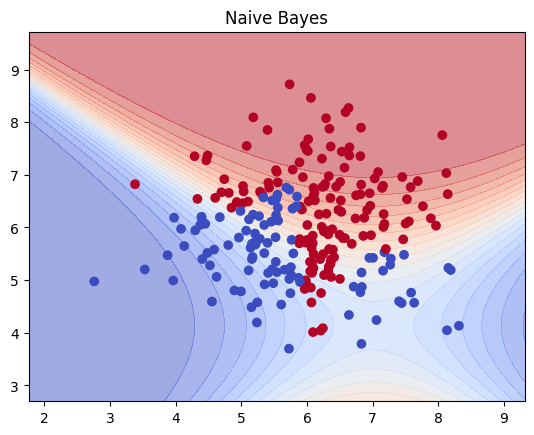

In [41]:
# Define the hyperparameters to tune
nb_hyperparameters = {
    'var_smoothing': np.logspace(0, -9, num=20)
}

nb_gridsearch = GridSearchCV(estimator=GaussianNB(), param_grid=nb_hyperparameters)

nb_gridsearch.fit(X_fold, y_fold)

# Print the best parameters and the best score
print(f'Best parameters: {nb_gridsearch.best_params_}')
print(f'Best cross-validation accuracy: {nb_gridsearch.best_score_:.2f}')
plot_probability_heatmap(nb_gridsearch, X_fold, y_fold, 'Naive Bayes')

***Bonus question: explain what is going on your plot.***

*Naive Bayes assumes that the features follow a normal (Gaussian) distribution. If the data are not normally distributed the performance are not optimal, like showed by the graph*


## Decision tree

**Can we obtain probabilities with decision trees?**

Probability prediction using Decision Tree:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


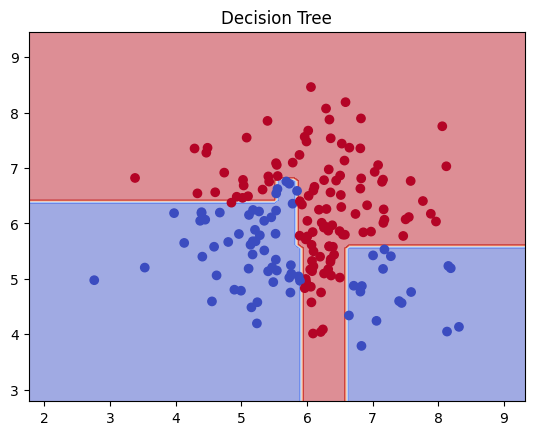

In [42]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print(f"Probability prediction using Decision Tree: ",  tree.predict_proba(X_test)[:5])
plot_probability_heatmap(tree, X_train, y_train, 'Decision Tree')

**Are there hyper-parameters with decision trees?**

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}
Best cross-validation accuracy: 0.96


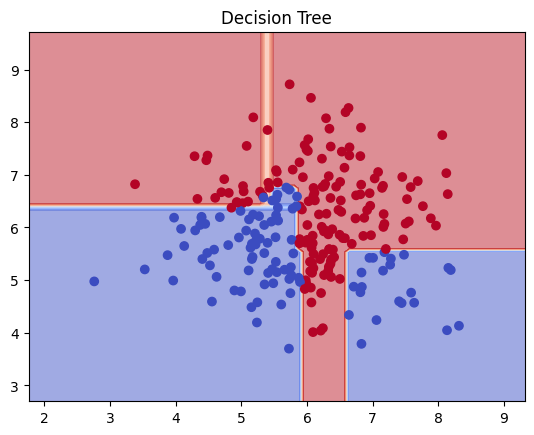

In [43]:
# Define the hyperparameters to tune
tree_hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Initialize the GridSearchCV object
tree_gridsearch = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=tree_hyperparameters)

# Fit the grid search to the data
tree_gridsearch.fit(X_fold, y_fold)

# Print the best parameters and the best score
print(f'Best parameters: {tree_gridsearch.best_params_}')
print(f'Best cross-validation accuracy: {tree_gridsearch.best_score_:.2f}')

plot_probability_heatmap(tree_gridsearch, X_fold, y_fold, 'Decision Tree')

**Similarly to K-NN earlier, fit decision trees with a max depth ranging for 1 to 10 on the training dataset, and plot the confidence heatmap.**

Probability prediction using Decision Tree with max_depth=1:  [[0.69863014 0.30136986]
 [0.1682243  0.8317757 ]
 [0.1682243  0.8317757 ]
 [0.69863014 0.30136986]
 [0.1682243  0.8317757 ]]


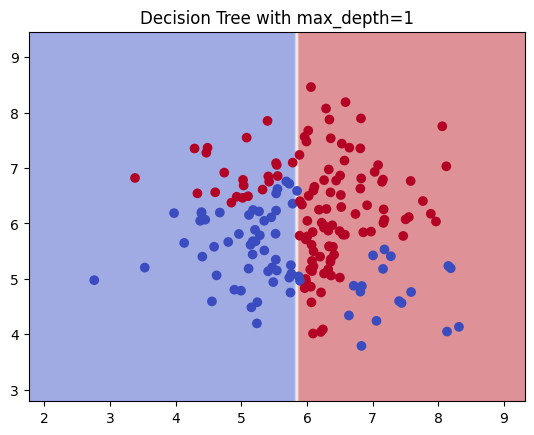

Probability prediction using Decision Tree with max_depth=2:  [[1.   0.  ]
 [0.45 0.55]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]]


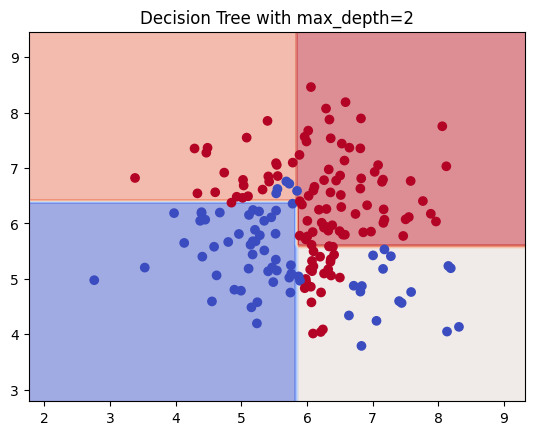

Probability prediction using Decision Tree with max_depth=3:  [[1.         0.        ]
 [0.04347826 0.95652174]
 [0.         1.        ]
 [1.         0.        ]
 [0.         1.        ]]


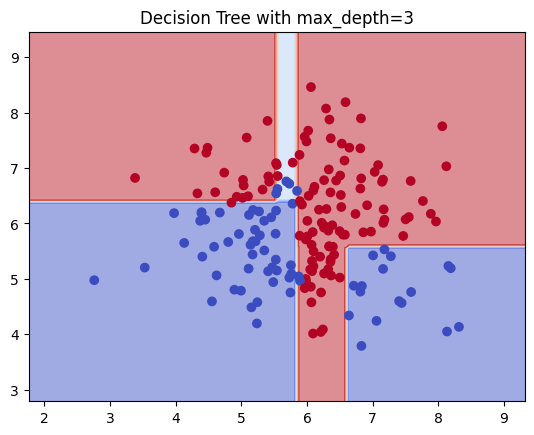

Probability prediction using Decision Tree with max_depth=4:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


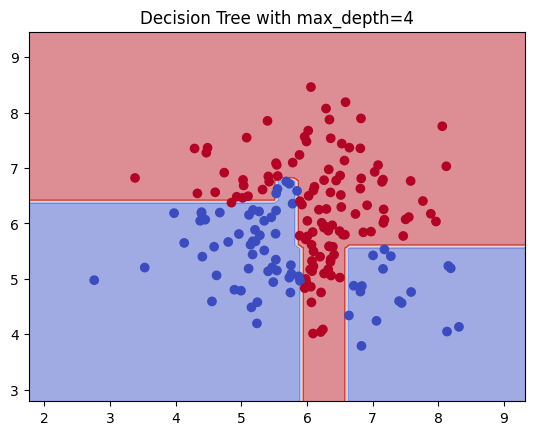

Probability prediction using Decision Tree with max_depth=5:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


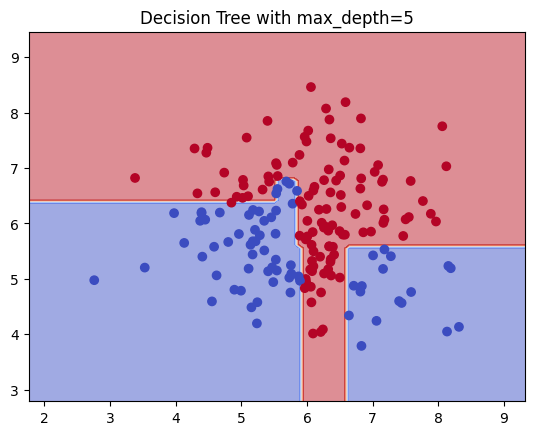

Probability prediction using Decision Tree with max_depth=6:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


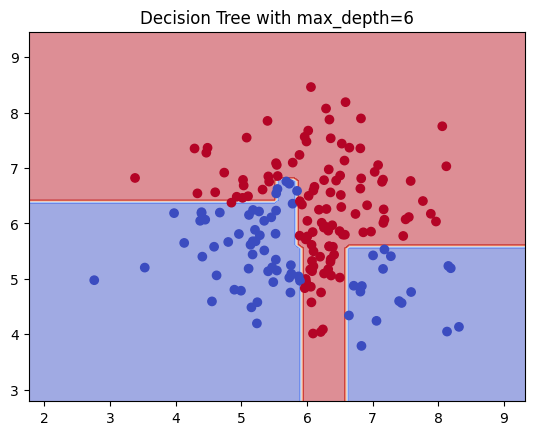

Probability prediction using Decision Tree with max_depth=7:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


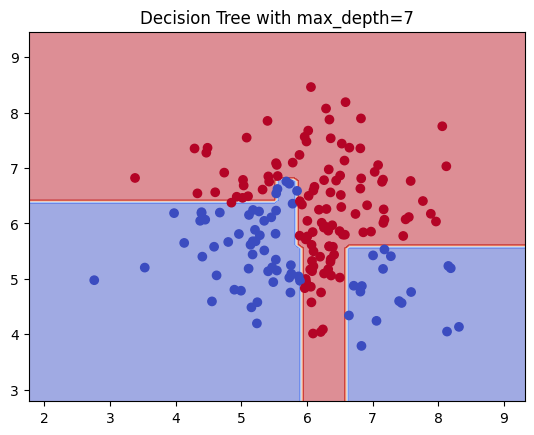

Probability prediction using Decision Tree with max_depth=8:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


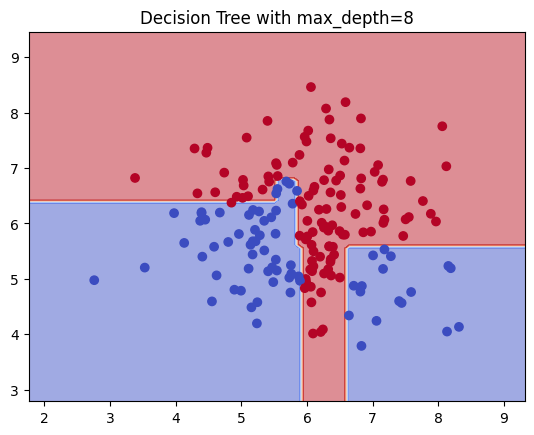

Probability prediction using Decision Tree with max_depth=9:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


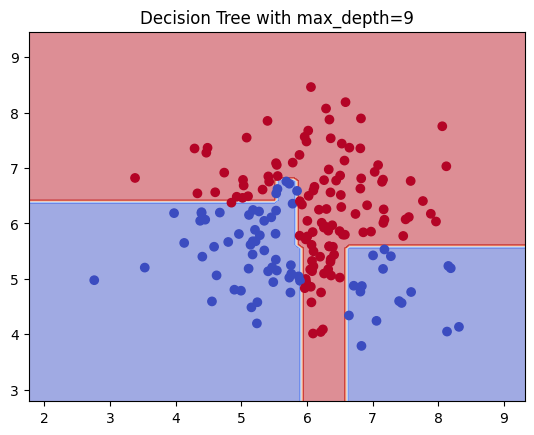

Probability prediction using Decision Tree with max_depth=10:  [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


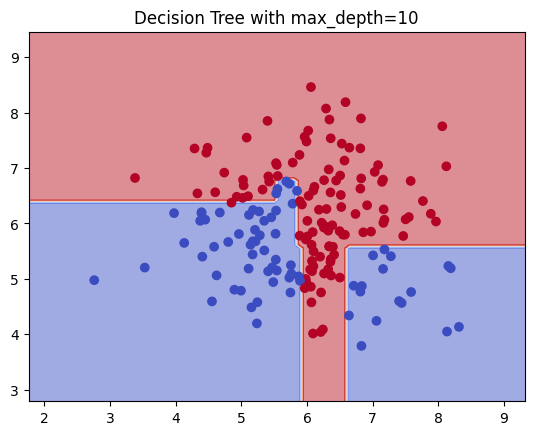

In [44]:
for i in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=i)
    tree.fit(X_train, y_train)
    print(f"Probability prediction using Decision Tree with max_depth={i}: ",  tree.predict_proba(X_test)[:5])
    plot_probability_heatmap(tree, X_train, y_train, f'Decision Tree with max_depth={i}')

**Briefly explain what's happening**

*A decision tree classifier works by recursively splitting the data into subsets based on feature values, aiming to create homogeneous subsets with respect to the target variable. The max_depth parameter controls the maximum depth of the tree, which is the longest path from the root node to a leaf node. 
A shallow tree will have fewer splits and simpler decision boundaries. This can lead to underfitting, as it may not capture the complexity of the data.
A deeper tree will have more splits and more complex decision boundaries. This can lead to overfitting.*

***Bonus question: what is the max depth that may be reached on this train set?***

This question may be slightly harder.

In [46]:
X_train.shape

(180, 2)

*In the worst-case scenario, the maximum depth is equal to the number of samples minus one, because each split could potentially separate only one sample from the rest. In this case the max is 180 as we have 180 points in the training set.*

## SVM

**Can we obtain "probabilities" with SVM?**

In [56]:
from sklearn.svm import SVC

svm = SVC(probability=True, kernel='linear')
svm.fit(X_train, y_train)
print(f"Probability prediction using SVM: ",  svm.predict_proba(X_test)[:5])

Probability prediction using SVM:  [[0.56617552 0.43382448]
 [0.72783655 0.27216345]
 [0.2971738  0.7028262 ]
 [0.8676434  0.1323566 ]
 [0.09933365 0.90066635]]


**Fit a <ins>single</ins> linear Support Vector Classifier on the training set, and display the heatmap**

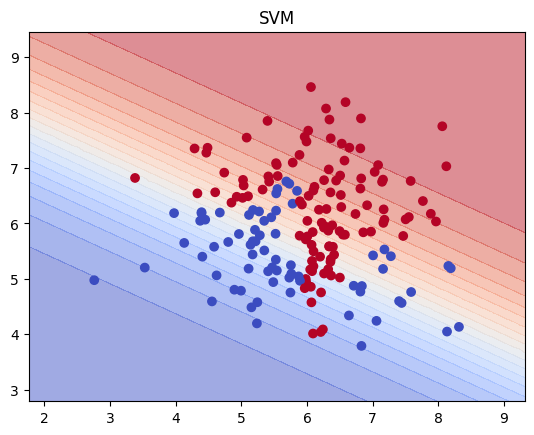

In [57]:
plot_probability_heatmap(svm, X_train, y_train, 'SVM')

**Now, compute polynomial features of any degree, e.g. 3, and fit a <ins>linear</ins> SVC on these new features. Display the heatmap.**

Fitting the model may take some time.

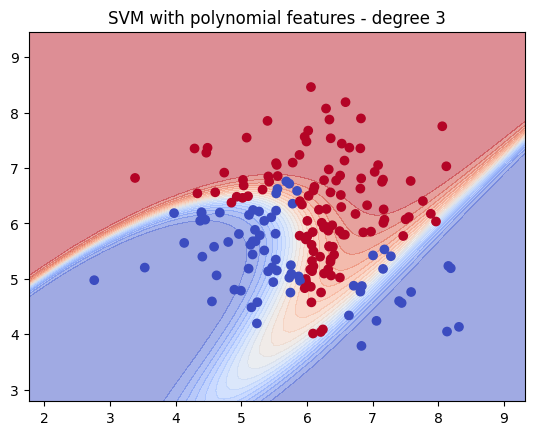

In [66]:
# Define the pipeline
pipeline_svm = Pipeline([
    ('poly', PolynomialFeatures(degree=3)), 
    ('svm', SVC(probability=True, kernel='linear')),
])

# Fit the pipeline
pipeline_svm.fit(X_train, y_train)

plot_probability_heatmap(pipeline_svm, X_train, y_train, 'Linear SVM with polynomial features - degree 3')


**Fit a SVC on the initial 2D features, this time using a polynomial kernel of degree e.g. 3. Display the heatmap.**

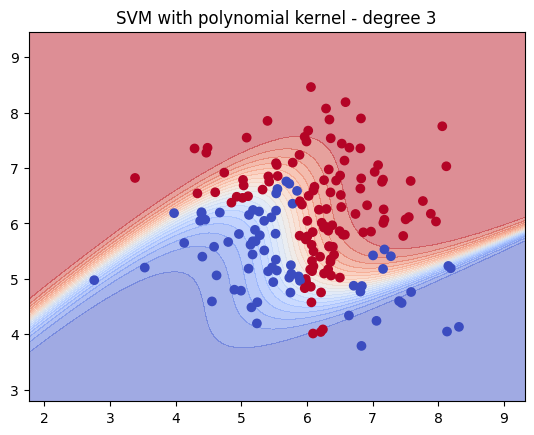

In [67]:
svm_ply = SVC(probability=True, kernel='poly', degree=3)
svm_ply.fit(X_train, y_train)
plot_probability_heatmap(svm_ply, X_train, y_train, 'SVM with polynomial kernel - degree 3')

**Notice anything?**

*Both approaches map data to a 3rd-degree polynomial space, enabling non-linear decision boundaries. The linear kernel with polynomial features does this explicitly, while the polynomial kernel does it implicitly*

**Now fit SVCs with polynomial kernel of degree 1 to 5, and plot the heatmaps.**

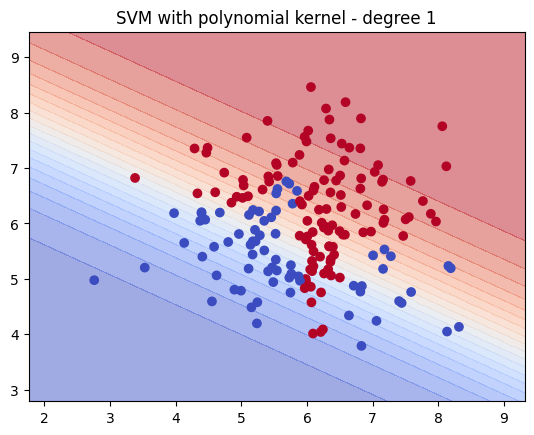

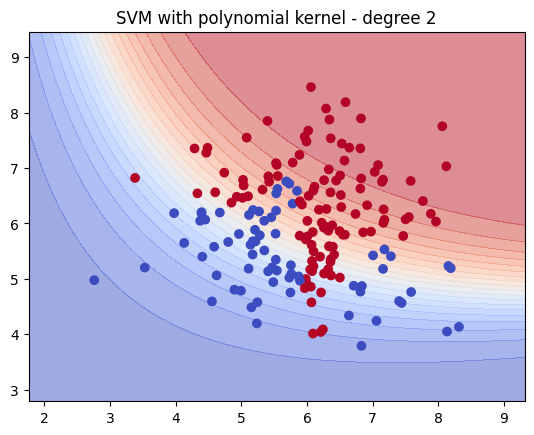

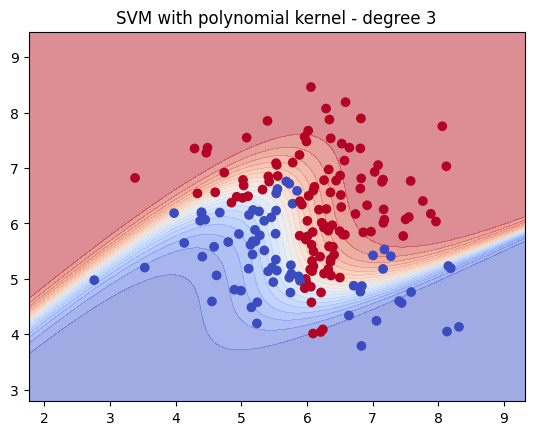

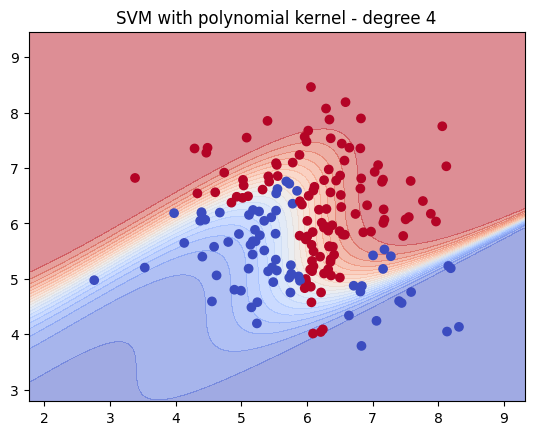

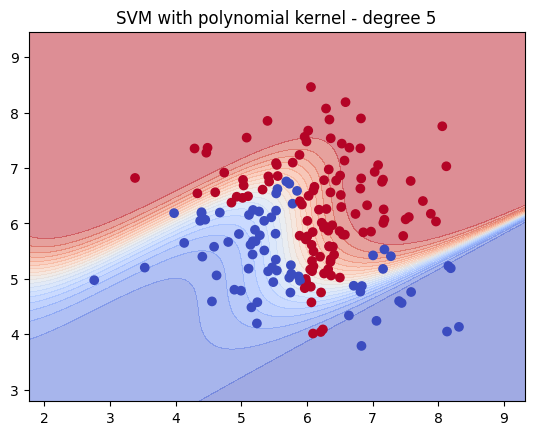

In [68]:
for degree in range(1, 6):
    svm_ply = SVC(probability=True, kernel='poly', degree=degree)
    svm_ply.fit(X_train, y_train)
    plot_probability_heatmap(svm_ply, X_train, y_train, f'SVM with polynomial kernel - degree {degree}')

**Briefly describe what is happening.**

*Each degree adds more polynomial terms, making the optimization process becomes more complex, as the algorithm has to find a separating hyperplane in a higher-dimensional space.*

**Finally, use an RBF kernel. This time, use a good protocol to obtain reasonably good performance with RBF kernel.**

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation accuracy: 0.96


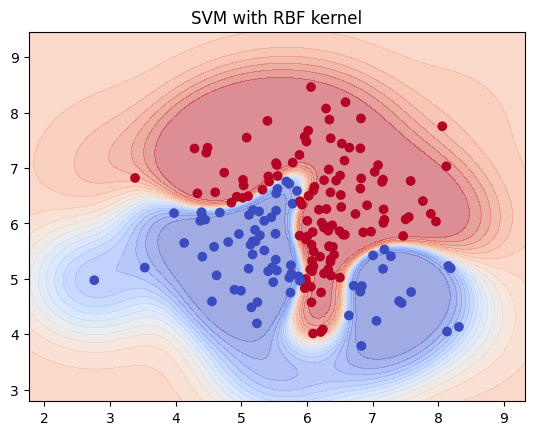

In [70]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True, kernel='rbf'), param_grid)

# Fit the grid search to the data
grid_search.fit(X_fold, y_fold)

# Print the best parameters and the best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation accuracy: {grid_search.best_score_:.2f}')

# Plot the probability heatmap using the best estimator
plot_probability_heatmap(grid_search.best_estimator_, X_train, y_train, 'SVM with RBF kernel')